<h1 style="text-align:right;font-size:140%;color:#000000; font-family: 'XB Zar';"> <strong>فصل 2  - یک پروژه یادگیری ماشین: از آغاز تا پایان</strong>
</h1>
<hr>



<p style="text-align:right;font-size:130%; direction: rtl; color:#000000; font-family: 'XB Zar';">در این فصل، یک پروژه یادگیری ماشین را از صفر تا صد انجام می‌دهیم. در این مثال، در قالب یک متخصص داده‌پردازی فرو می‌رویم که به تازگی در یک شرکت سرمایه‌گذاری املاک و مستغلات استخدام شده است. توجه داشته باشید که این یک پروژه‌ی یادگیری ماشین خیالی است و هدف آن آموزش خرید و فروش ملک و آپارتمان نیست!<br><br>
<strong>مراحل اصلی یک پروژه‌ی یادگیری ماشین عبارتند از:</strong></p>


<div style="direction:rtl; font-size: 19px; font-family: 'XB Zar'; line-height: 200%">
  <a href="#1" style="color: #5B0F6D; font-weight: bold;"> &#9679;  بررسی کلیات پروژه و تعیین چارچوب مساله</a><br>
  <a href="#2" style="color: #5B0F6D; font-weight: bold;">&#9679;  بارگذاری داده</a><br>
  <a href="#3" style="color: #5B0F6D; font-weight: bold;">&#9679;  کاوش و مجسم سازی دیتاست برای شناخت بهتر داده</a><br>
  <a href="#4" style="color: #5B0F6D; font-weight: bold;">&#9679;  آماده کردن داده برای الگوریتم یادگیری ماشین</a><br>
  <a href="#5" style="color: #5B0F6D; font-weight: bold;">&#9679;  انتخاب و آموزش مدل</a><br>
  <a href="#6" style="color: #5B0F6D; font-weight: bold;">&#9679;  تنظیم دقیق مدل</a><br>
  <a href="#7" style="color: #5B0F6D; font-weight: bold;">&#9679;  ارائه‌ی سیستم</a><br>
  <a href="#8" style="color: #5B0F6D; font-weight: bold;">&#9679;  راه‌اندازی، پایش و نگهداری سیستم</a>
</div>



<br><br><h1 style="text-align:right;font-size:120%; direction: rtl;direction: rtl; color:#000000; font-family: 'XB Zar';">&#128165;در ادامه، این 8 گام به صورت پله به پله بررسی و پیاده‌سازی می‌شوند.</h1><br><hr>

<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">ابتدا، چند ماژول رایج را وارد می‌کنیم و اطمینان حاصل می‌کنیم که MatplotLib شکل‌ها را به صورت درون‌خطی نمایش می‌دهد. سپس یک تابع برای ذخیره کردن شکل‌ها آماده می‌کنیم. همچنین بررسی می‌کنیم که نسخه Python 3.5 یا بالاتر نصب شده باشد. اگرچه Python 2.x ممکن است کار کند، اما منسوخ شده است و به شدت توصیه می‌کنیم از Python 3 استفاده کنید. علاوه بر این، باید نسخه 0.20 یا بالاتر Scikit-Learn نیز نصب شده باشد.</p>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



<hr><br><h1 style="text-align:right;font-size:140%; direction: rtl;direction: rtl; color:#5B0F6D; font-family: 'XB Zar';"><strong>گام اول : کلیات پروژه را بررسی کرده و چارچوب مسئله را مشخص کنید.</strong></h1><a id='1'></a>


<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">
اولین قدم برای اجرای پروژه یادگیری ماشین شرکت سرمایه گذاری املاک و مستغلات این است که داده‌های آماری مورد نیاز برای ساخت مدل را دریافت کنیم. این اطلاعات شامل جمعیت، میانگین درآمد ساکنان و میانگین قیمت خانه برای تعداد زیادی از مجتمع‌های مسکونی در ایالت کالیفرنیا است.
</p>
<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">
بهترین منبع برای یافتن اطلاعات اولیه درباره‌ی یک پروژه رئیس شرکت (یا مدیر پروژه) است، و اولین پرسشی که باید از این رئیس بپرسیم این است که هدف کسب و کار او دقیقاً چیست. مسلماً ساختن یک مدل یادگیری ماشین! هدف غایی هیچ کسب و کاری نیست، بلکه باید دید شرکت چه انتظاراتی از این مدل دارد. دانستن هدف کسب و کار بسیار مهم است، چون در واقع همین هدف است که تعیین می‌کند چه مسأله‌ای را باید حل کنیم، چه الگوریتمی برای حل آن انتخاب کنیم، چه مقدار تلاش برای تنظیم دقیق مدل به خرج دهیم.
</p>



<hr><br><h1 style="text-align:right;font-size:140%; direction: rtl;direction: rtl; color:#5B0F6D; font-family: 'XB Zar';"><strong>گام دوم : بارگذاری داده</strong></h1><a id='2'></a>

<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">در شرایط عادی، داده‌ها معمولاً به صورت پایگاه داده‌های رابطه‌ای و در چندین جدول، سند یا فایل ذخیره می‌شوند. اما در این پروژه، اوضاع ساده‌تر است: برای بارگذاری دیتاست «مجتمع‌های مسکونی کالیفرنیا»، کافی است یک فایل فشرده به نام housing.tgz ، که حاوی فایلی با فرمت CSV است، را بارگذاری کنید. می‌توانید این فایل را مستقیماً از طریق مرورگر وب دانلود کرده و سپس با فرمان tar xzf housing.tgz آن را از حالت فشرده خارج کنید. با این حال، بهتر است برای این کار یک تابع کوچک بنویسیم. مزیت چنین تابعی این است که اگر محتوای فایل موردنظر (دیتاست) به‌طور منظم تغییر کند، می‌توان هر بار آن را اجرا کرده و محتوای جدید را به‌راحتی دریافت کرد. این روش به‌ویژه زمانی که دیتاست در چندین کامپیوتر توزیع شده باشد، بسیار کارآمدتر است. تابع موردنظر را در ادامه مشاهده می‌کنید:
</p>

In [5]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [7]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

<hr><br><h1 style="text-align:right;font-size:140%; direction: rtl;direction: rtl; color:#000000; font-family: 'XB Zar';"><strong>نگاهی سریع به ساختار داده در دیتاست</strong></h1><a id='2'></a>

<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">با متد ()head شیء دیتافریم میتوان پنج سطر اول دیتاست را مشاهده کرد</p>

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">با متد ()info هم میتوانیم اطلاعات ساختاری مفیدی از دیتاست بدست آوریم</p>

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">از تابع ()value_counts کمک میگیریم<br> این تابع معمولاً برای پیدا کردن فراوانی داده‌های تکراری در یک ستون به کار می‌رود و می‌تواند به شما کمک کند تا توزیع داده‌ها را بهتر درک کنید.</p>

In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">اکنون نگاهی به سایر فیلدها می‌اندازیم. 
</p>

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


AttributeError: 'Axes' object has no attribute 'is_first_col'

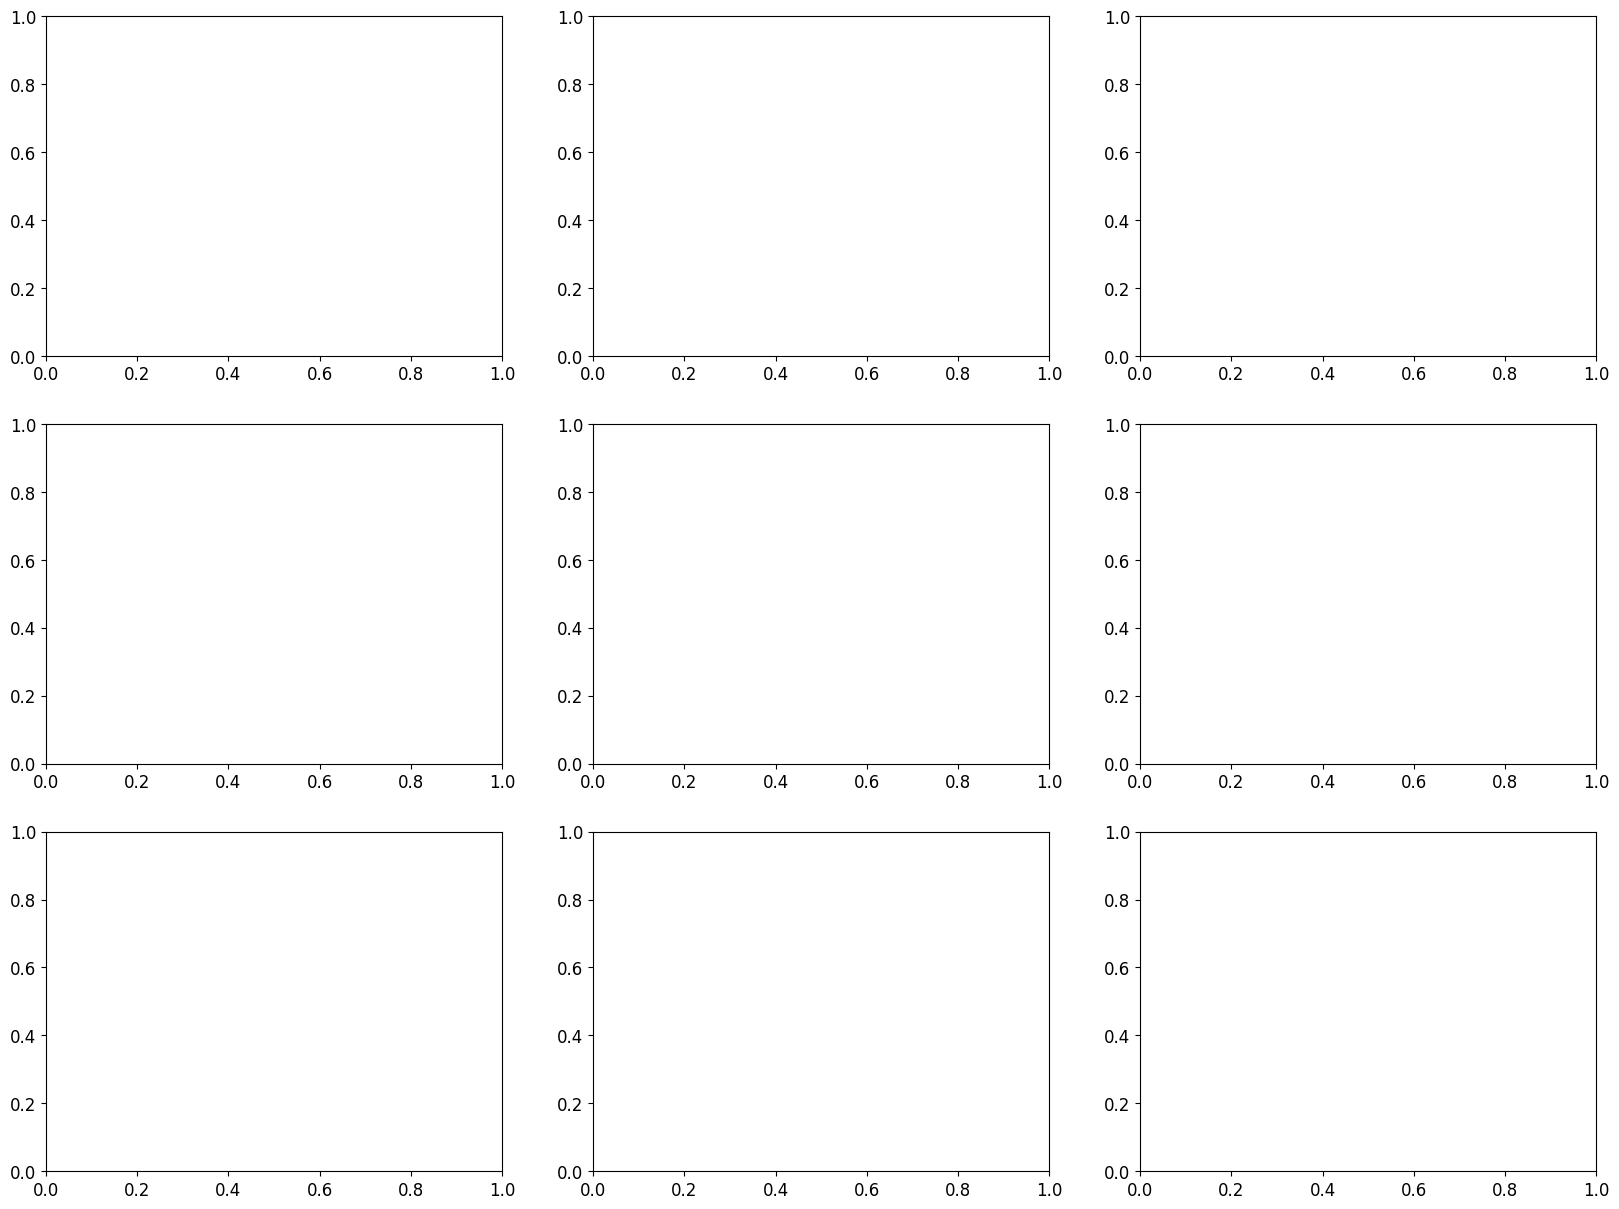

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [11]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [12]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [17]:

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [18]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [20]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [21]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

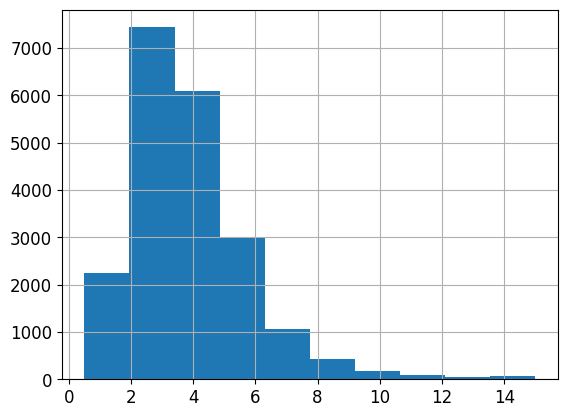

In [23]:
housing["median_income"].hist()

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [25]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

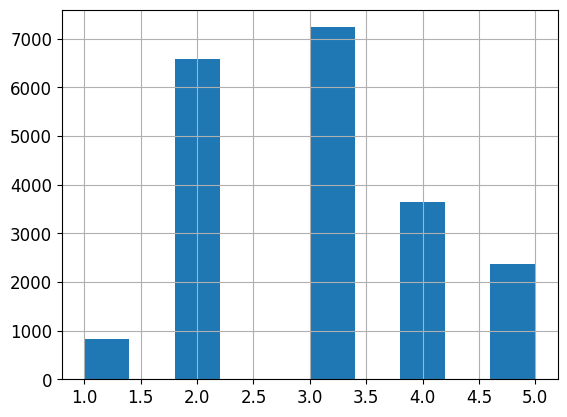

In [26]:
housing["income_cat"].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [29]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [30]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [41]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [42]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


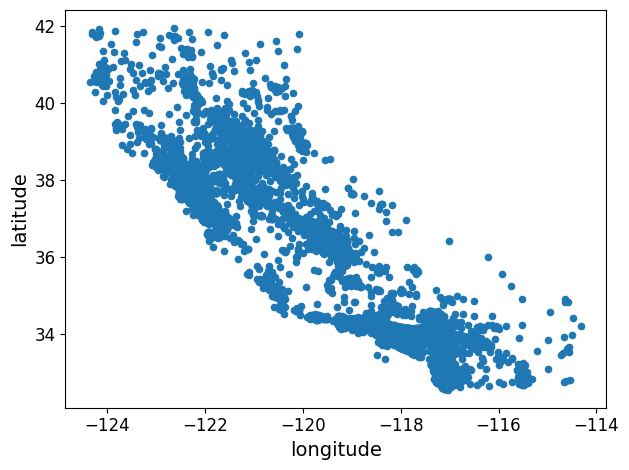

In [45]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


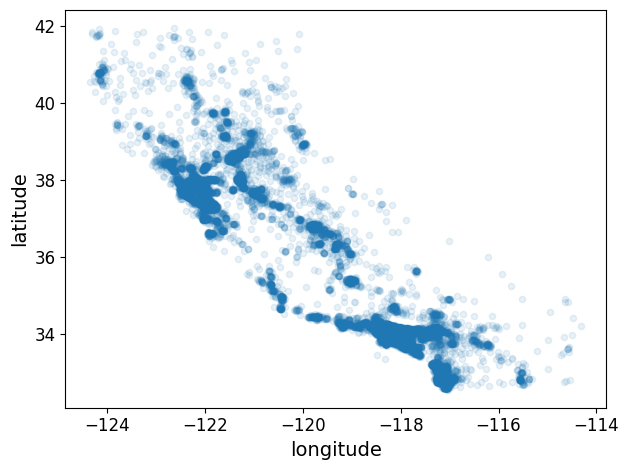

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")